In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 76619+1696
df = MongoBlotter(collection='live_blotter').read()
df.tail(20)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
243,5f52518753df08daaa6a6ddf,2020-09-04 16:39:03.672,2020-09-04 14:39:03.569,NQU0,SELL,1.0,11273.750000,[00019125.5f521e80.01.01],69,677265432,ENTRY,2.10,0.00
244,5f52529553df08daaa6a6de8,2020-09-04 16:43:33.679,2020-09-04 14:43:33.678,NQU0,BUY,1.0,11168.750000,[00019125.5f522466.01.01],0,1710077163,MANUAL TRADE,2.10,2095.80
245,5f52530153df08daaa6a6de9,2020-09-04 16:45:21.377,2020-09-04 14:45:21.373,MNQU0,BUY,1.0,11196.000000,[00019125.5f5227aa.01.01],71,677265436,STOP-LOSS,0.47,155.06
246,5f52530153df08daaa6a6dea,2020-09-04 16:45:21.578,2020-09-04 14:45:21.566,NQU0,BUY,1.0,11197.750000,[00019125.5f5227ac.01.01],72,677265437,STOP-LOSS,2.10,0.00
247,5f52535153df08daaa6a6deb,2020-09-04 16:46:41.695,2020-09-04 14:46:41.693,NQU0,SELL,1.0,11209.750000,[00019125.5f522994.01.01],0,1710077164,MANUAL TRADE,2.10,235.80
248,5f52557b53df08daaa6a6df4,2020-09-04 16:55:55.707,2020-09-04 14:55:55.667,YM SEP 20,BUY,1.0,27892.000000,[0001911f.5f517aa0.01.01],59,677265409,STOP-LOSS,2.10,1025.80
249,5f52557b53df08daaa6a6df5,2020-09-04 16:55:55.804,2020-09-04 14:55:55.705,MYM SEP 20,BUY,3.0,27892.000000,[0001911f.5f517aa1.01.01],60,677265413,STOP-LOSS,1.41,304.18
250,5f52558053df08daaa6a6df6,2020-09-04 16:56:00.694,2020-09-04 14:56:00.692,MESU0,BUY,4.0,3382.500000,[00019123.5f5200ef.01.01],56,677265404,STOP-LOSS,1.88,776.24
251,5f525bf353df08daaa6a6e0f,2020-09-04 17:23:31.656,2020-09-04 15:23:31.581,YM SEP 20,SELL,1.0,27742.000000,[0001911f.5f517d23.01.01],73,677265440,ENTRY,2.10,0.00
252,5f525bf953df08daaa6a6e10,2020-09-04 17:23:37.932,2020-09-04 15:23:37.794,MYM SEP 20,SELL,3.0,27747.666667,"[0001911f.5f517d24.01.01, 0001911f.5f517d25.01...",74,677265443,ENTRY,1.41,0.00


In [3]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [25]:
df.tail(20)

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2020-09-04 14:39:03.569,2020-09-04 16:39:03.672,NQ,SELL,1.0,11273.750000,69,ENTRY,2.10,0.00,79851.709998
2020-09-04 14:43:33.678,2020-09-04 16:43:33.679,NQ,BUY,1.0,11168.750000,0,MANUAL TRADE,2.10,2095.80,81947.509998
2020-09-04 14:45:21.373,2020-09-04 16:45:21.377,NQ,BUY,0.1,11196.000000,71,STOP-LOSS,0.47,155.06,82102.569998
2020-09-04 14:45:21.566,2020-09-04 16:45:21.578,NQ,BUY,1.0,11197.750000,72,STOP-LOSS,2.10,0.00,82102.569998
2020-09-04 14:46:41.693,2020-09-04 16:46:41.695,NQ,SELL,1.0,11209.750000,0,MANUAL TRADE,2.10,235.80,82338.369998
2020-09-04 14:55:55.667,2020-09-04 16:55:55.707,YM,BUY,1.0,27892.000000,59,STOP-LOSS,2.10,1025.80,83364.169998
2020-09-04 14:55:55.705,2020-09-04 16:55:55.804,YM,BUY,0.3,27892.000000,60,STOP-LOSS,1.41,304.18,83668.349998
2020-09-04 14:56:00.692,2020-09-04 16:56:00.694,ES,BUY,0.4,3382.500000,56,STOP-LOSS,1.88,776.24,84444.589998
2020-09-04 15:23:31.581,2020-09-04 17:23:31.656,YM,SELL,1.0,27742.000000,73,ENTRY,2.10,0.00,84444.589998


In [5]:
c = set(df['contract'])
#allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ', 'ES', 'GC', 'YM', 'total'])

In [6]:
allocs

NQ       0.400
ES       0.125
GC       0.225
YM       0.250
total    1.000
dtype: float64

In [7]:
df.groupby('contract').realizedPNL.sum()

contract
ES    -2819.730000
GC    -5491.080000
NQ    11107.999998
YM      827.600000
Name: realizedPNL, dtype: float64

In [8]:
df.realizedPNL.sum()

3624.789998

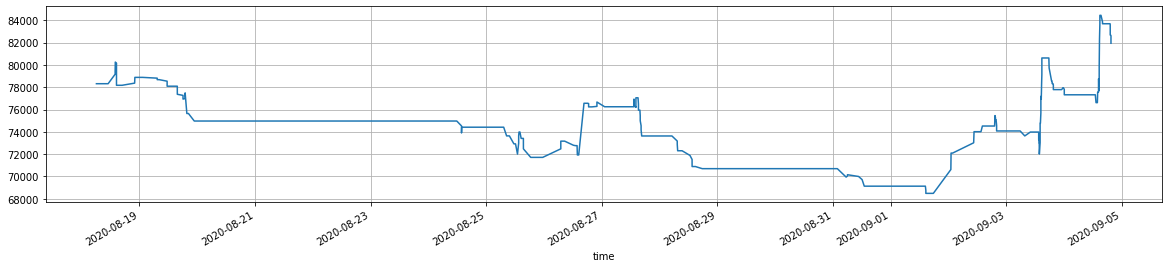

In [9]:
df.cash.plot(figsize=(20,4), grid=True);

In [10]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [11]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     24
 GC     41
 NQ    158
 YM     40
 Name: action, dtype: int64,
 263)

In [12]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES     1.714286
 GC     2.928571
 NQ    11.285714
 YM     2.857143
 Name: action, dtype: float64,
 18.785714285714285)

In [13]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     60.98
GC    113.66
NQ    374.00
YM     98.40
Name: commission, dtype: float64

In [14]:
df.commission.sum()

647.04

In [15]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
NQ,0.43,165.49,982.82,-452.05,2.17,164.94,68.0
GC,0.29,-266.95,699.73,-653.62,1.07,-261.15,17.2
ES,0.42,-88.74,1105.60,-941.84,1.17,-81.92,8.7
YM,0.30,64.18,1234.77,-437.51,2.82,64.17,16.0
total,0.39,58.23,991.19,-529.19,1.87,63.76,109.9


In [16]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [17]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,-0.191004,0.168120,0.237604,0.415496
GC,-0.191004,1.000000,0.294840,-0.570845,0.276298
NQ,0.168120,0.294840,1.000000,0.217619,0.926456
YM,0.237604,-0.570845,0.217619,1.000000,0.392912
total,0.415496,0.276298,0.926456,0.392912,1.000000


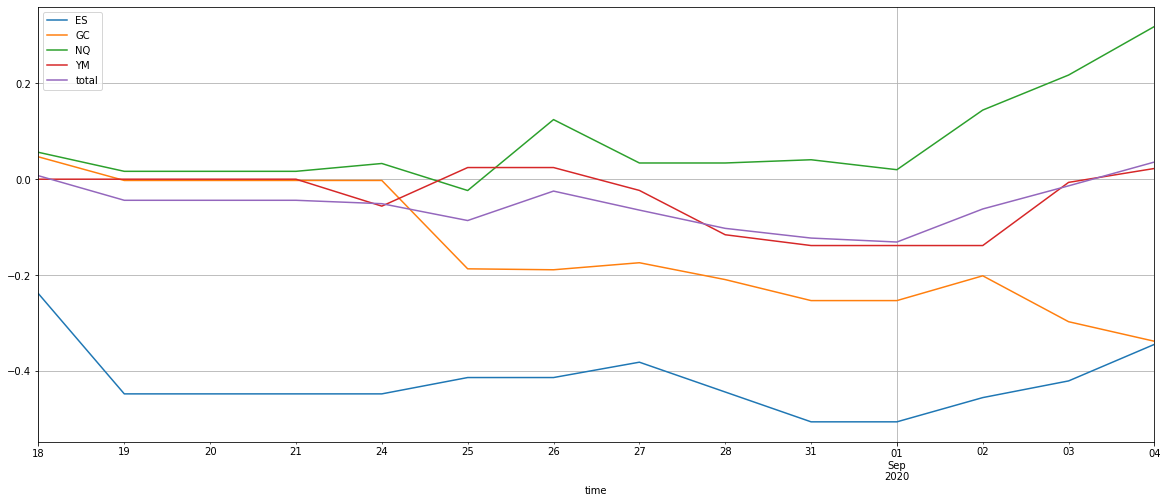

In [18]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

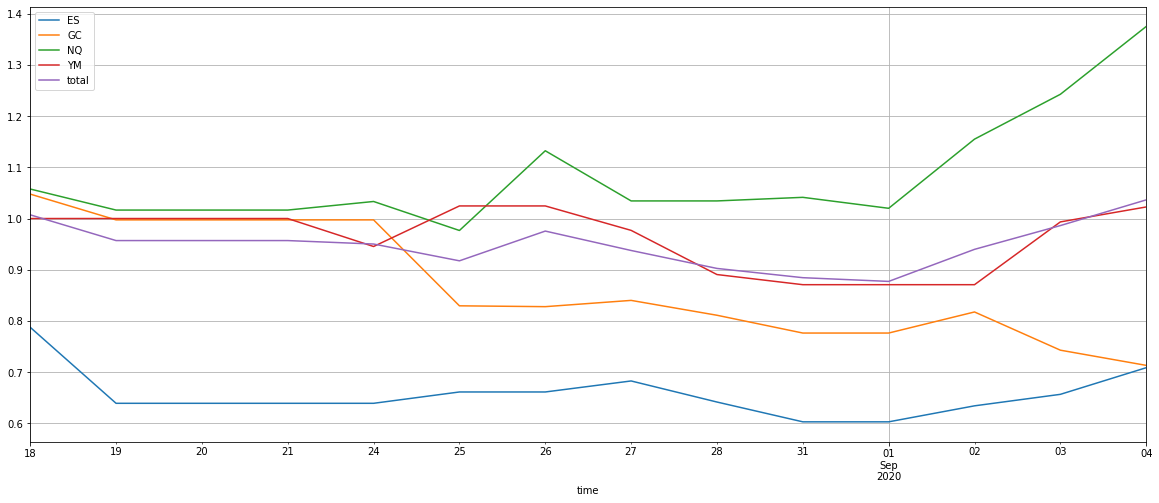

In [19]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [20]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,-0.997978,-0.997730,308.824163,0.495479,0.904880
Cumulative returns,-0.291531,-0.286962,0.375293,0.022610,0.036450
Annual volatility,1.354266,0.902595,1.141580,0.892444,0.640646
Sharpe ratio,-3.828435,-6.214551,5.591098,0.852564,1.300447
Calmar ratio,-2.511855,-3.123264,3110.430498,3.298720,7.003791
Stability,0.066727,0.882308,0.450940,0.165273,0.010165
Max drawdown,-0.397307,-0.319451,-0.099287,-0.150203,-0.129199
Omega ratio,0.448054,0.270595,2.765293,1.199482,1.236003
Sortino ratio,-4.118508,-6.328197,13.489993,1.545495,2.327391
Skew,-1.290058,-1.133539,0.432345,0.931819,0.456205


In [21]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-08-31,-39.73,-22.38,4.14,-12.93,-11.56
2020-09-30,17.55,-8.14,32.06,17.45,17.19


In [22]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES      -29.0
GC      -29.0
NQ       38.0
YM        2.0
total     4.0
dtype: float64

In [23]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-08-26 16:38:55.001,NQ,SELL,11920.75,4631.60
2020-09-02 01:02:04.400,NQ,SELL,12384.75,2135.80
2020-09-04 14:43:33.678,NQ,BUY,11168.75,2095.80
2020-09-04 14:38:48.345,NQ,BUY,11283.75,1980.80
2020-09-03 14:06:43.737,YM,SELL,29021.00,1730.80
...,...,...,...,...
2020-09-04 19:13:55.292,NQ,SELL,11644.00,-919.20
2020-09-04 14:27:26.106,NQ,BUY,11427.75,-974.20
2020-09-03 18:52:01.856,GC,BUY,1941.80,-1164.84


In [24]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-09-02,0.051873,0.053071,0.132501,0.000000,0.071426
2020-08-26,0.000000,-0.001977,0.159519,0.000000,0.063363
2020-09-04,0.079294,-0.039979,0.106630,0.029418,0.050923
2020-09-03,0.035432,-0.091351,0.075863,0.140901,0.049445
2020-08-18,-0.212536,0.047740,0.057682,0.000000,0.007248
2020-08-20,0.000000,0.000000,0.000000,0.000000,0.000000
2020-08-21,0.000000,0.000000,0.000000,0.000000,0.000000
2020-08-24,0.000000,0.000000,0.016491,-0.054665,-0.007070
2020-09-01,0.000000,0.000000,-0.020567,0.000000,-0.008227
